In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
new_df = pd.read_csv("Crypto data.csv")
new_df["Date"] = pd.to_datetime(new_df["Date"])
new_df.head(20)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,name,symbols
0,2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,4324200990,0,0,Bitcoin,BTC
1,2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,5244856836,0,0,Bitcoin,BTC
2,2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,4530215219,0,0,Bitcoin,BTC
3,2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,0,0,Bitcoin,BTC
4,2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,0,0,Bitcoin,BTC
5,2019-01-06,3836.519043,4093.297363,3826.513184,4076.632568,5597027440,0,0,Bitcoin,BTC
6,2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,5228625637,0,0,Bitcoin,BTC
7,2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,5306593305,0,0,Bitcoin,BTC
8,2019-01-09,4031.552002,4068.403564,4022.662842,4035.296387,5115905225,0,0,Bitcoin,BTC
9,2019-01-10,4034.411377,4064.066650,3659.174561,3678.924561,6874143796,0,0,Bitcoin,BTC


In [5]:
Ethereum = new_df[new_df["symbols"]== "ETH"].copy()
new_Ethereum = pd.DataFrame(Ethereum)
new_Ethereum

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,name,symbols
1207,2019-01-01,133.418152,141.397507,132.650711,140.819412,2258709868,0,0,Etherum,ETH
1208,2019-01-02,141.519516,156.929138,140.650955,155.047684,3328240369,0,0,Etherum,ETH
1209,2019-01-03,155.196045,155.863052,147.198364,149.135010,2676164880,0,0,Etherum,ETH
1210,2019-01-04,148.912888,156.878983,147.907104,154.581940,3126192535,0,0,Etherum,ETH
1211,2019-01-05,154.337418,160.824890,154.337418,155.638596,3338211928,0,0,Etherum,ETH
...,...,...,...,...,...,...,...,...,...,...
2409,2022-04-17,3061.881836,3075.775879,2989.043945,2993.403320,10463091281,0,0,Etherum,ETH
2410,2022-04-18,2993.483887,3062.520996,2893.912842,3057.606689,18629381299,0,0,Etherum,ETH
2411,2022-04-19,3057.570312,3125.084229,3035.535156,3104.106445,14156035096,0,0,Etherum,ETH
2412,2022-04-20,3103.935059,3157.885742,3045.288330,3077.745850,15547362265,0,0,Etherum,ETH


In [6]:
new_Ethereum.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1207.0,1207.0
mean,1260.608791,1302.210761,1214.562778,1262.693108,1.607875e+10,0.0,0.0
std,1389.819258,1433.043012,1340.174356,1389.704088,1.084683e+10,0.0,0.0
min,104.645050,106.058876,95.184303,104.535301,2.212109e+09,0.0,0.0
25%,184.354614,188.127129,180.283356,184.466347,8.132079e+09,0.0,0.0
50%,365.402466,376.630402,354.340179,365.590485,1.368806e+10,0.0,0.0
75%,2470.023682,2599.292114,2329.349731,2484.644897,2.062336e+10,0.0,0.0
max,4810.071289,4891.704590,4718.039062,4812.087402,8.448291e+10,0.0,0.0


In [7]:
#Dropping the dividends and stocksplits
new_Ethereum.drop(['name', 'Date', "Dividends" , "Stock Splits", "symbols" ], axis = 1, inplace = True)

new_Ethereum.head()

,Open,High,Low,Close,Volume
1207,133.418152,141.397507,132.650711,140.819412,2258709868
1208,141.519516,156.929138,140.650955,155.047684,3328240369
1209,155.196045,155.863052,147.198364,149.135010,2676164880
1210,148.912888,156.878983,147.907104,154.581940,3126192535
1211,154.337418,160.824890,154.337418,155.638596,3338211928


In [8]:
x =  np.array(new_Ethereum.drop(['Close'], 1))
#print(x)
y = np.array(new_Ethereum['Close'])


C:\Users\nudou\AppData\Local\Temp\ipykernel_26260\2804090753.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x =  np.array(new_Ethereum.drop(['Close'], 1))


In [9]:
x

array([[1.33418152e+02, 1.41397507e+02, 1.32650711e+02, 2.25870987e+09],
       [1.41519516e+02, 1.56929138e+02, 1.40650955e+02, 3.32824037e+09],
       [1.55196045e+02, 1.55863052e+02, 1.47198364e+02, 2.67616488e+09],
       ...,
       [3.05757031e+03, 3.12508423e+03, 3.03553516e+03, 1.41560351e+10],
       [3.10393506e+03, 3.15788574e+03, 3.04528833e+03, 1.55473623e+10],
       [3.07782935e+03, 3.17345142e+03, 2.96241040e+03, 2.07835911e+10]])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)# 70% training and 30% test
print(y_test)

[ 433.35491943  157.74620056  244.69891357  125.5837326   149.092453
  208.17401123  146.47653198 2150.0402832   183.34835815  174.71099854
  182.59957886  249.47433472 4239.98144531 2933.47900391 2405.18115234
 3164.02514648  241.22198486  173.70843506  217.56001282 1225.67810059
 4084.45239258 3020.08984375  158.41244507 3431.08618164  471.63043213
 3319.25732422  370.67172241  226.56616211  435.07974243 1788.21704102
  239.45817566  274.6890564   233.02827454  133.0921936   122.03271484
  167.12051392 1626.57568359  142.02914429  122.10038757  368.85592651
 3095.82592773  413.77297974 2315.16186523  409.76669312 3155.52368164
 3962.46972656 2919.20117188 2299.18774414  184.69216919  124.51902008
  197.3175354  2925.56567383 1533.27502441  349.35559082  166.72712708
  163.45069885  139.82286072  197.22471619  391.02416992  461.00527954
 3426.39428711  119.43088531 3769.69702148  180.16017151 4340.76367188
  200.76724243 3212.30493164  406.46377563  228.19487     383.15673828
  453.55

In [11]:
scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)
scaled_y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
scaled_y_test = scaler.fit_transform(np.array(y_test).reshape(-1, 1))

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr_model= DecisionTreeRegressor(
            max_depth= 15,
           max_features  = None,
           max_leaf_nodes = None)
#fitting the model
dtr_model.fit(scaled_x_train, scaled_y_train)
#predicting
dt_y_prediction = dtr_model.predict(scaled_x_test)
rmse = np.sqrt(mean_squared_error(scaled_y_test, dt_y_prediction))
mae = mean_absolute_error(scaled_y_test, dt_y_prediction)
print('Root Mean Square Error:', rmse)
print('Mean Absolute Error:', mae)


#print('Explained Variance Score : ', explained_variance_score(scaled_y_train, dt_y_prediction))


Root Mean Square Error: 0.015566754103669258
Mean Absolute Error: 0.008659851054011364


In [13]:
dt_y_prediction


from sklearn.metrics import r2_score

rfr_prediction = dtr_model.predict(scaled_x_test)


print(rfr_prediction[:10])
print(scaled_x_test[:10])

print('Test R^2     : %.3f'%r2_score(scaled_y_test, dt_y_prediction))
print('Test R^2     : %.3f'%dtr_model.score(scaled_x_test, scaled_y_test))
print('Training R^2 : %.3f'%dtr_model.score(scaled_x_train, scaled_y_train))

[0.06903714 0.01152619 0.03109792 0.00317352 0.00785521 0.02025433
 0.00526512 0.43152084 0.01618149 0.01209279]
[[0.07142238 0.07011691 0.07349062 0.12235267]
 [0.01051757 0.01067863 0.01097155 0.01049829]
 [0.03195866 0.03160754 0.031372   0.09071591]
 [0.00515922 0.00474343 0.00497688 0.09217579]
 [0.00841413 0.00855211 0.00942327 0.01658503]
 [0.02242506 0.02172019 0.02154076 0.24640483]
 [0.00768432 0.00874983 0.00685664 0.10465385]
 [0.43291219 0.43086008 0.43177469 0.35836872]
 [0.0158556  0.01589533 0.01725066 0.0538357 ]
 [0.01286235 0.01409682 0.01347502 0.06746833]]
Test R^2     : 0.998
Test R^2     : 0.998
Training R^2 : 1.000


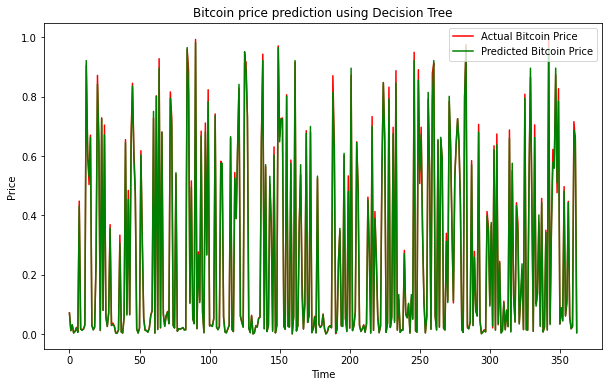

In [14]:

plt.figure(figsize=(10,6))
plt.plot(scaled_y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(dt_y_prediction, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin price prediction using Decision Tree')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()